# Setup

## Get jupyter and python running on your machine

## Packages

Make sure to have the following packages installed:

* numpy
* cv2
* matplotlib

In [114]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import numpy as np

## Software

### Install Gimp on your machine and make sure that it is running

### If you are on Windows, you also might want  to install paint.net

# Images

## Use matplotlib to read the following image THI.jpg

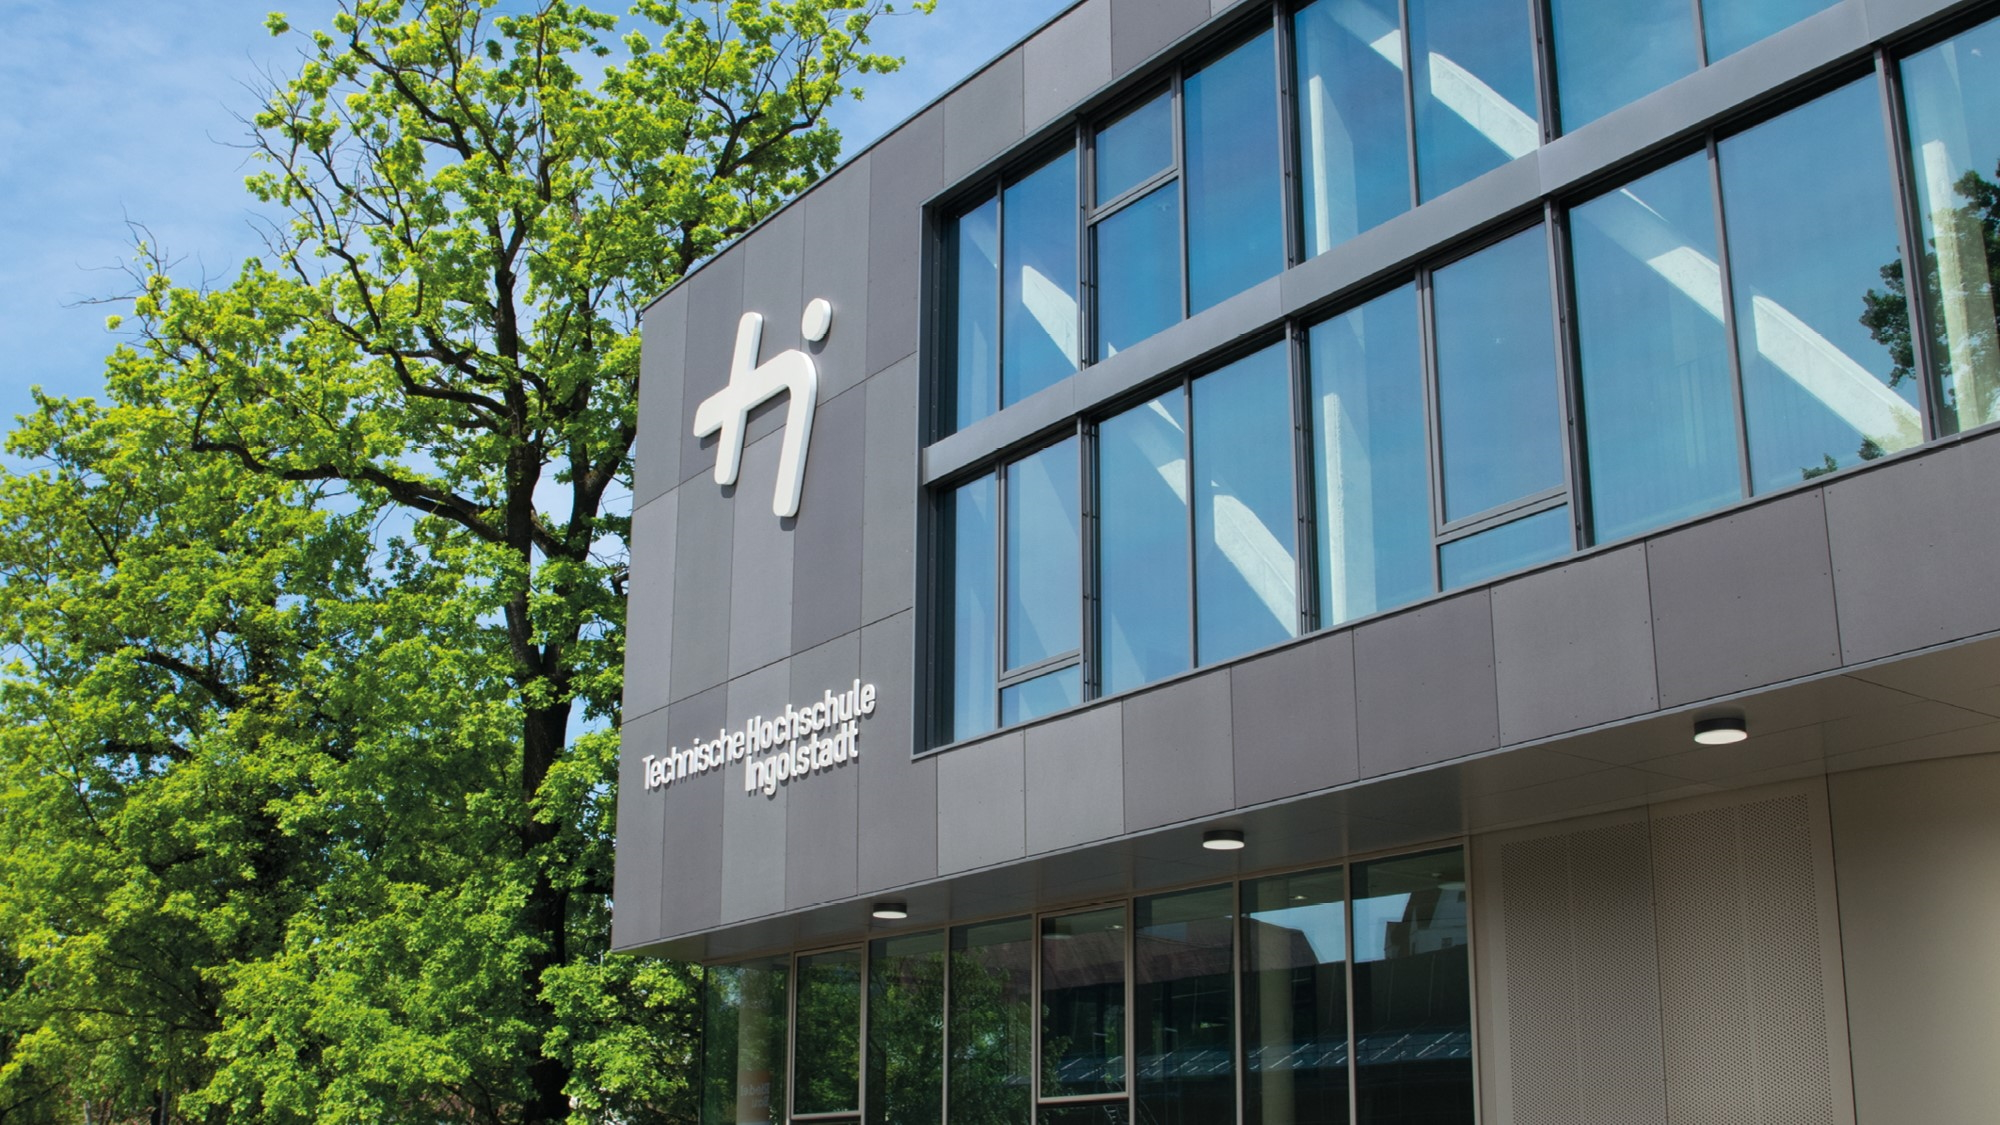

In [115]:
pic = plt.imread(r"C:\Users\nessl\OneDrive\Desktop\Studium\Semester 4\Bildverstehen\Praktikum\Praktikum 1\THI.jpg")

## What data structure does the image have?

In [116]:
pic.shape

(1125, 2000, 3)

## What is the shape of the array and what is stored where?

Height: 1125px
Widht: 2000px
Channels: 3

## Split the image into three channels, one for red, green and blue

Text(0.5, 1.0, 'Blue Channel')

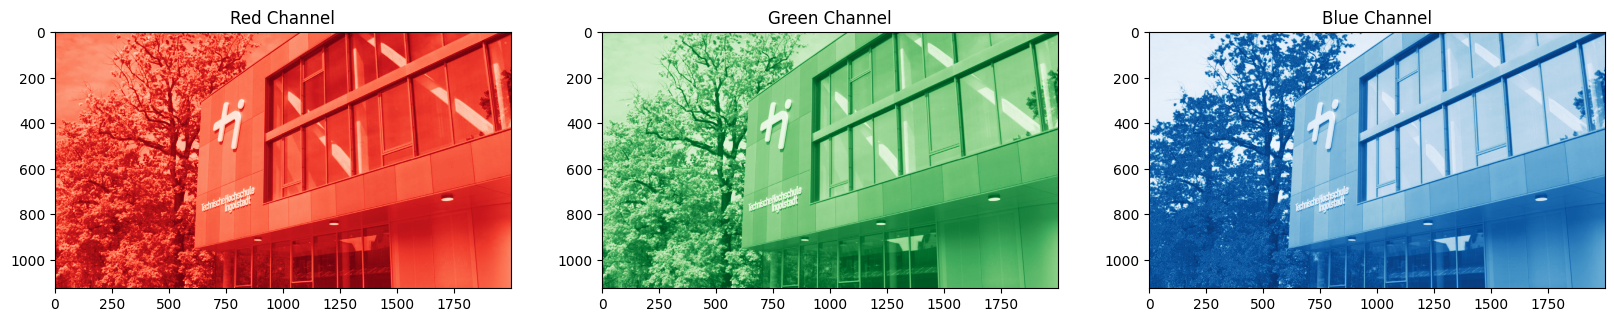

In [117]:
red = pic[:,:,0]
green = pic[:,:,1]
blue = pic[:,:,2]

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds_r')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens_r')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues_r')
plt.title('Blue Channel')



## Print each channel individually

## Get the pixel at coordinate 100, 100 and derive the r,g,b values from it

In [118]:
pixel = pic[100, 100]

red_value = pixel[0]
green_value = pixel[1]
blue_value = pixel[2]

print(f"Red is {red_value}, Green is {green_value} and Blue is {blue_value}")
print("Red is %d, Green is %d and Blue is %d" % (red_value, green_value, blue_value))

Red is 154, Green is 192 and Blue is 231
Red is 154, Green is 192 and Blue is 231


## Use a graphic program (e.g. Gimp) and check what color this pixel encodes. Verify your result in the original image using the graphics program.

## What are the corresponding values in the HSV scale?

In [119]:
import matplotlib.colors as colors

hsv_values = colors.rgb_to_hsv([red_value / 255.0, green_value / 255.0, blue_value / 255.0])
hue = round(hsv_values[0]*360,2)
hue
# print(f"Hue is {hsv_values[0]*360}°, Saturation is {hsv_values[1]*100}% and Value is {hsv_values[2]*100}%")

210.39

# OpenCV

OpenCV is a software package that we will be using during this practical course frequently.

## Make sure to install the <code>cv2</code> package

In [120]:
import cv2

## Read the same image as before, but this time using opencv

In [121]:
pic = cv2.imread(r"C:\Users\nessl\OneDrive\Desktop\Studium\Semester 4\Bildverstehen\Praktikum\Praktikum 1\THI.jpg")

## Again, check the data structure and shape

In [122]:
pic.shape

(1125, 2000, 3)

## Get the pixel at coordinate 100, 100 and derive the r,g,b values from it

In [123]:
pixel = pic[100, 100]

red_value = pixel[0]
green_value = pixel[1]
blue_value = pixel[2]

print(f"Red is {red_value}, Green is {green_value} and Blue is {blue_value}")

Red is 231, Green is 192 and Blue is 154


## Why are they different?

Die Werte sind dieselben, jedoch sind die Kanäle Rot und Blau bei OpenCV vertauscht

# Fourier


## Calculate and plot the fourier transform of the grayscale THI image

You can use the numpy rfft function to get the fast discrete fourier transformation.

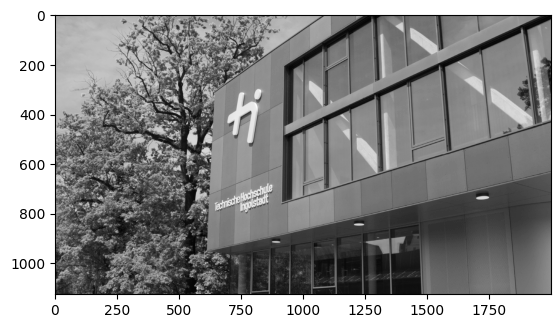

In [170]:
img = cv2.imread("THI.jpg", cv2.IMREAD_GRAYSCALE)
fft = np.fft.fft2(img)
plt.imshow(img, cmap='gray')

## Plot the spectrum

C:\Users\nessl\AppData\Local\Temp\ipykernel_17512\318695510.py:2: RuntimeWarning: divide by zero encountered in log
  magnitude = np.log(np.abs(fft))


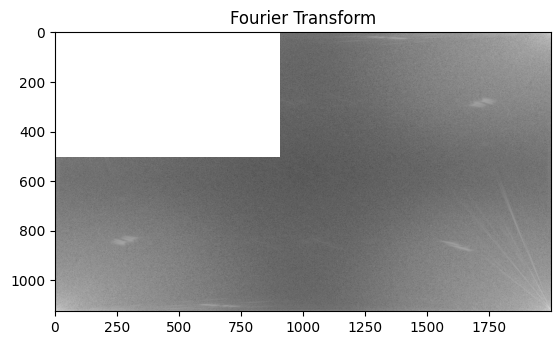

In [198]:
# Get the magnitures of the fft result 
magnitude = np.log(np.abs(fft))

plt.imshow(magnitude, cmap='gray')
plt.title('Fourier Transform')

plt.show()

## Implement a high and a low pass filter that can be applied to the fft result

In [172]:
fft_backup = fft.copy()

C:\Users\nessl\AppData\Local\Temp\ipykernel_17512\2031999701.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fft)), cmap='gray')


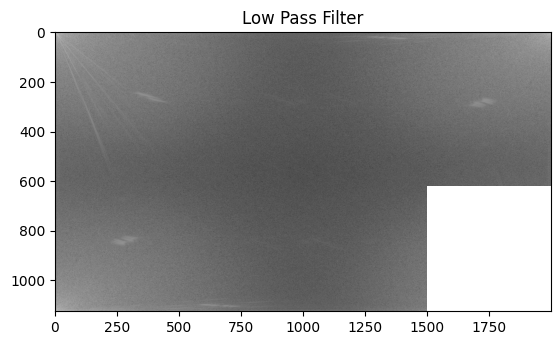

In [183]:
rows_lp = (1125-500)
col_lp = 1500
fft = fft_backup.copy()
for idx_row, i in enumerate(fft):
    for idx_col, j in enumerate(i):
        if idx_row > rows_lp and idx_col > col_lp:
        # if idx_row**2 + idx_col**2 > col_lp**2:
            fft[idx_row][idx_col] = 0
fft_lp = fft
plt.imshow(np.log(np.abs(fft)), cmap='gray')
plt.title('Low Pass Filter')
plt.show()



C:\Users\nessl\AppData\Local\Temp\ipykernel_17512\901643467.py:11: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fft)), cmap='gray')


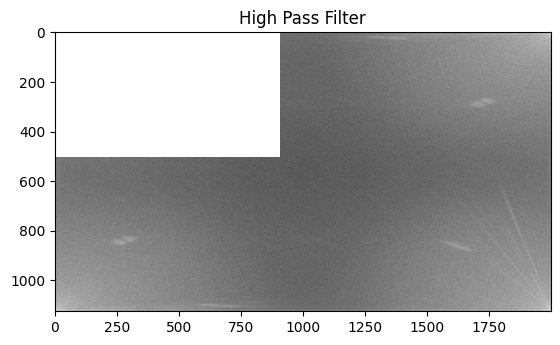

In [204]:
rows_hp = 500
col_hp = 900
fft = fft_backup.copy()

for idx_row, i in enumerate(fft):
    for idx_col, j in enumerate(i):
        if idx_row < rows_hp and idx_col < col_hp:
        # if idx_row**2 + idx_col**2 < 900**2:
            fft[idx_row][idx_col] = 0
fft_hp = fft
plt.imshow(np.log(np.abs(fft)), cmap='gray')
plt.title('High Pass Filter')
plt.show()



## Plot the filtered spectrum for low and high pass filtering

## Transform the filtered spectrum back to the original image space and plot the result

You can get the inverse transform by using <code>irfft</code>

array([[386.93604956, 343.83484589, 303.72584366, ..., 178.74900682,
        211.89395491, 232.51372416],
       [320.87603631, 288.3170785 , 261.11452425, ..., 133.40635902,
        154.80936367, 167.58498356],
       [314.22745024, 284.88883091, 259.23839745, ..., 124.98277474,
        145.97123976, 159.67635689],
       ...,
       [162.21770928, 151.10264604, 135.30333121, ..., 223.74761908,
        250.70868197, 279.2674828 ],
       [173.38401118, 160.49596421, 141.86146753, ..., 225.45839515,
        254.77672261, 285.42527228],
       [234.07551996, 210.91069554, 182.02306436, ..., 279.98465936,
        320.89416606, 356.85376298]])

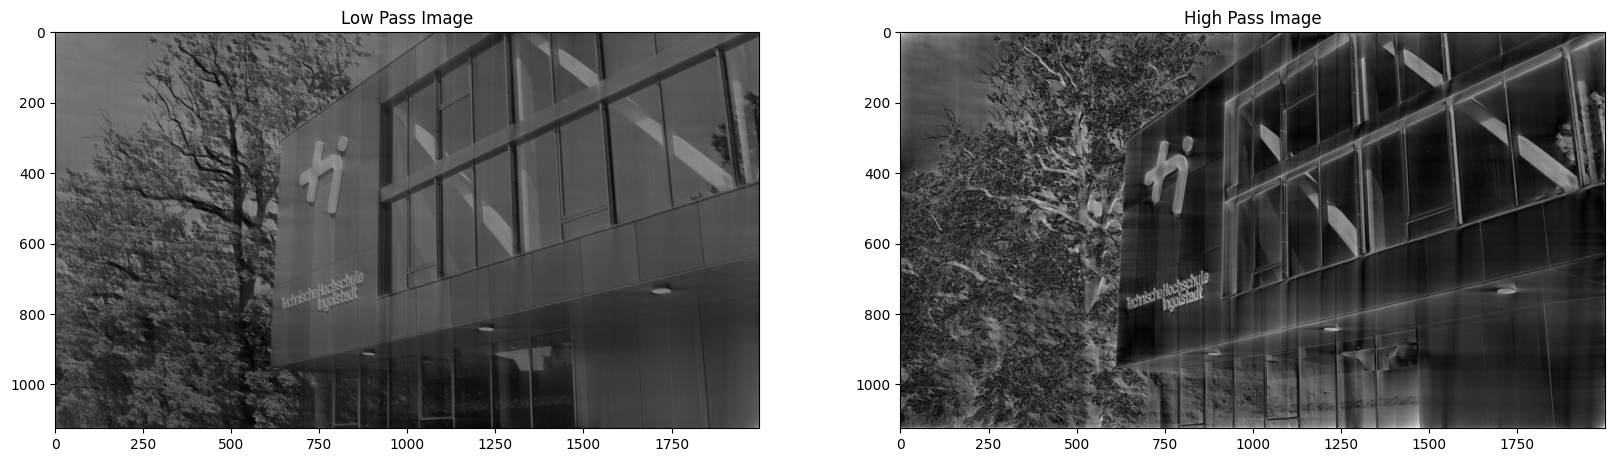

In [195]:
img_lp = np.fft.ifft2(fft_lp)
img_hp = np.fft.ifft2(fft_hp)
display(np.abs(img_lp))
plt.figure(figsize=(20,15))
plt.subplot(1, 2, 1) 
plt.imshow(np.abs(img_lp), cmap='gray')
plt.title('Low Pass Image') 

plt.subplot(1, 2, 2) 
plt.imshow(np.abs(img_hp), cmap='gray', vmax=150)
plt.title('High Pass Image') 

plt.show() 

In [210]:
fft[0][10]

0j

# JPEG

## Take the image <code>THI.jpg</code> and convert it to jpeg with different qualities

You can set the jpeg quality within the imwrite command <code>cv2.imwrite('THI_50.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 10])</code>

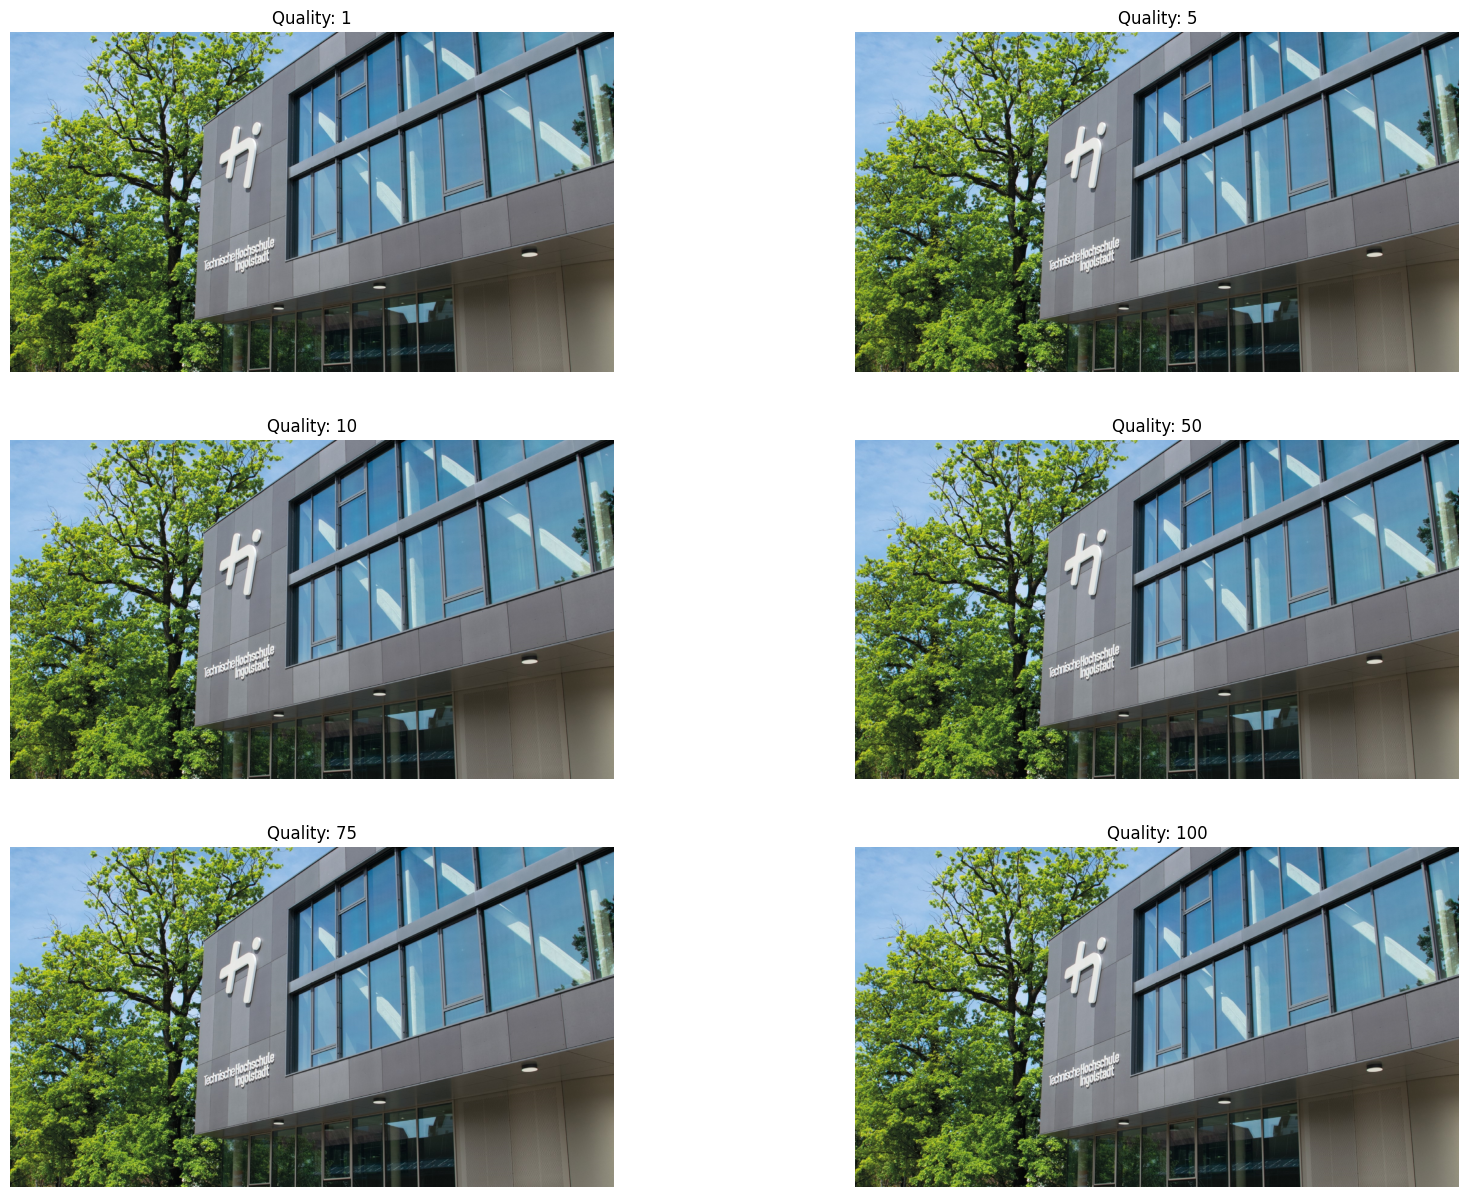

In [208]:
image = cv2.imread(r"C:\Users\nessl\OneDrive\Desktop\Studium\Semester 4\Bildverstehen\Praktikum\Praktikum 1\THI.jpg")
cv2.imwrite('THI_50.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 10])
# qual = [1,10,50,75,100]
# for q in qual:
#     cv2.imwrite(f'THI_{q}.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 10])

qual = [1, 5, 10, 50, 75, 100]
num_cols = 2  # Anzahl der Spalten pro Reihe
num_rows = (len(qual) + 1) // 2 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for idx, q in enumerate(qual):
    row = idx // num_cols
    col = idx % num_cols
    
    cv2.imwrite(f'THI_{q}.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), q])
    axes[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'Quality: {q}')
    axes[row, col].axis('off')

plt.show()

## What differences can you see at the different quality levels?

## How is the file size changing when reducing the quality?